## Step 1: Import the initial libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Read the Data

In [3]:
data= pd.read_csv("NKI_cleaned.csv",index_col=1)
data.head()

,Patient,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
ID,,,,,,,,,,,,,,,,,,,,,
18,s122,43,0,14.817248,14.817248,0,0,1,1,25,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
19,s123,48,0,14.261465,14.261465,0,0,0,1,20,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
20,s124,38,0,6.644764,6.644764,0,0,0,1,15,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
21,s125,50,0,7.748118,7.748118,0,1,0,1,15,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
22,s126,38,0,6.436687,6.318960,0,0,1,1,15,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [4]:
data.drop(columns=["Patient"],inplace=True,axis=1)
data.head()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
ID,,,,,,,,,,,,,,,,,,,,,
18,43,0,14.817248,14.817248,0,0,1,1,25,0,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
19,48,0,14.261465,14.261465,0,0,0,1,20,0,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
20,38,0,6.644764,6.644764,0,0,0,1,15,0,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
21,50,0,7.748118,7.748118,0,1,0,1,15,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
22,38,0,6.436687,6.318960,0,0,1,1,15,0,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


In [5]:
data.describe()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,44.047794,0.283088,8.080609,7.250433,0.393382,0.132353,0.441176,1.110294,22.529412,1.341912,...,-0.137075,-0.049257,-0.109779,-0.222577,-0.116336,-0.015141,-0.057222,-0.038441,-0.240416,-0.252884
std,5.464538,0.451329,3.904874,4.177462,0.489401,0.339499,0.497443,0.545668,8.703345,2.108848,...,0.414608,0.248084,0.434717,0.421388,0.274243,0.323474,0.297915,0.246020,0.482092,0.472775
min,26.000000,0.000000,0.711841,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,-1.071389,-0.641482,-1.363426,-1.252298,-0.841332,-2.000000,-0.871728,-0.593263,-1.679470,-2.000000
25%,40.750000,0.000000,5.499738,4.389460,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,...,-0.462427,-0.219615,-0.247377,-0.567609,-0.271186,-0.099996,-0.253693,-0.185253,-0.579311,-0.554709
50%,45.000000,0.000000,7.359343,6.950034,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,...,-0.098875,-0.055215,0.008589,-0.223481,-0.137765,-0.002994,-0.052311,-0.071930,-0.213540,-0.254435
75%,49.000000,1.000000,10.512662,9.986311,1.000000,0.000000,1.000000,1.000000,29.250000,2.000000,...,0.147836,0.119754,0.162106,0.072289,-0.022088,0.074571,0.166774,0.100221,0.116691,0.051704
max,53.000000,1.000000,18.340862,18.340862,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,...,0.739614,0.635155,1.009289,1.324539,1.173276,2.000000,0.591880,0.993960,1.298576,0.988492


## Step 3: Remove the uninterpretable Columns

The reason we remove it is because if we dont do it we will get an error called 
#### PerfectSeparationError: Perfect separation detected, results not available
    
This happens when all or nearly all of the values in one of the predictor categories 
(or a combination of predictors) are associated with only one of the binary outcome values. 
When this happens a solution cannot be found for the predictor coefficient.

In [6]:
# We can remove data columns that are uninterpretable
remove=data.columns[14:]
data=data.drop(remove,axis=1)
data.head()

,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode
ID,,,,,,,,,,,,,,
18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1,6274
19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1,6275
20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1,6276
21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1,6277
22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1,6278


In [7]:
data.eventdeath.value_counts()

0    195
1     77
Name: eventdeath, dtype: int64

## Step 4: Finding Missing values

In [8]:
data.isnull().sum()

age               0
eventdeath        0
survival          0
timerecurrence    0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
barcode           0
dtype: int64

#### We see there are no missing values and can proceed with the analysis

## Step 5: Visualising the data by creating hist and kde plots to observe the data distribution

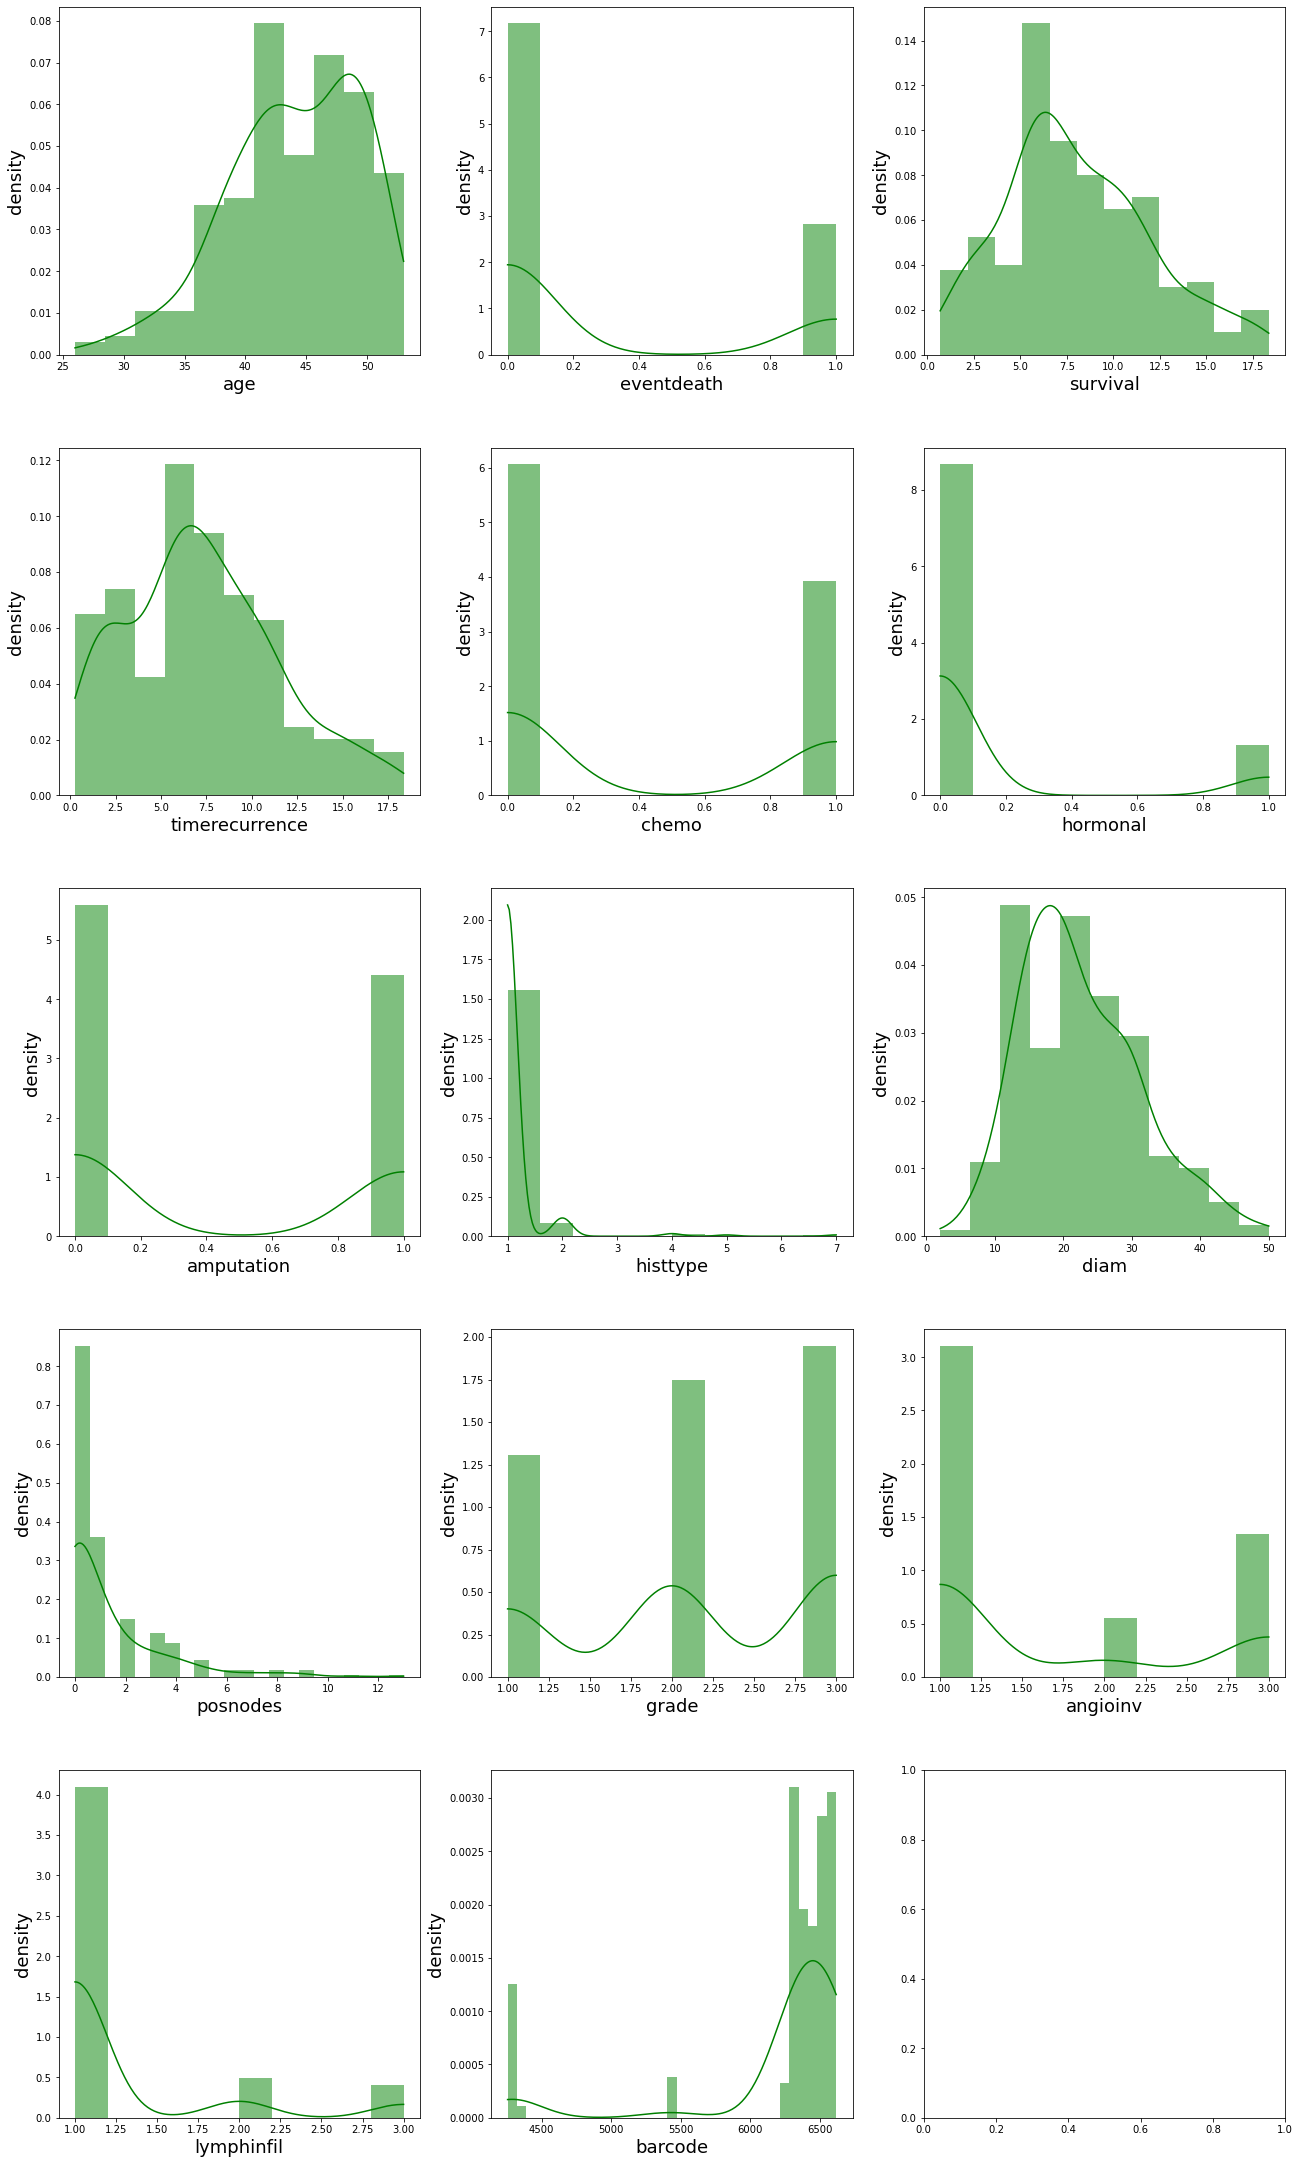

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(18,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.histplot(value, ax=ax[index], color='green',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### let's plot the correlation matrix

<AxesSubplot:>

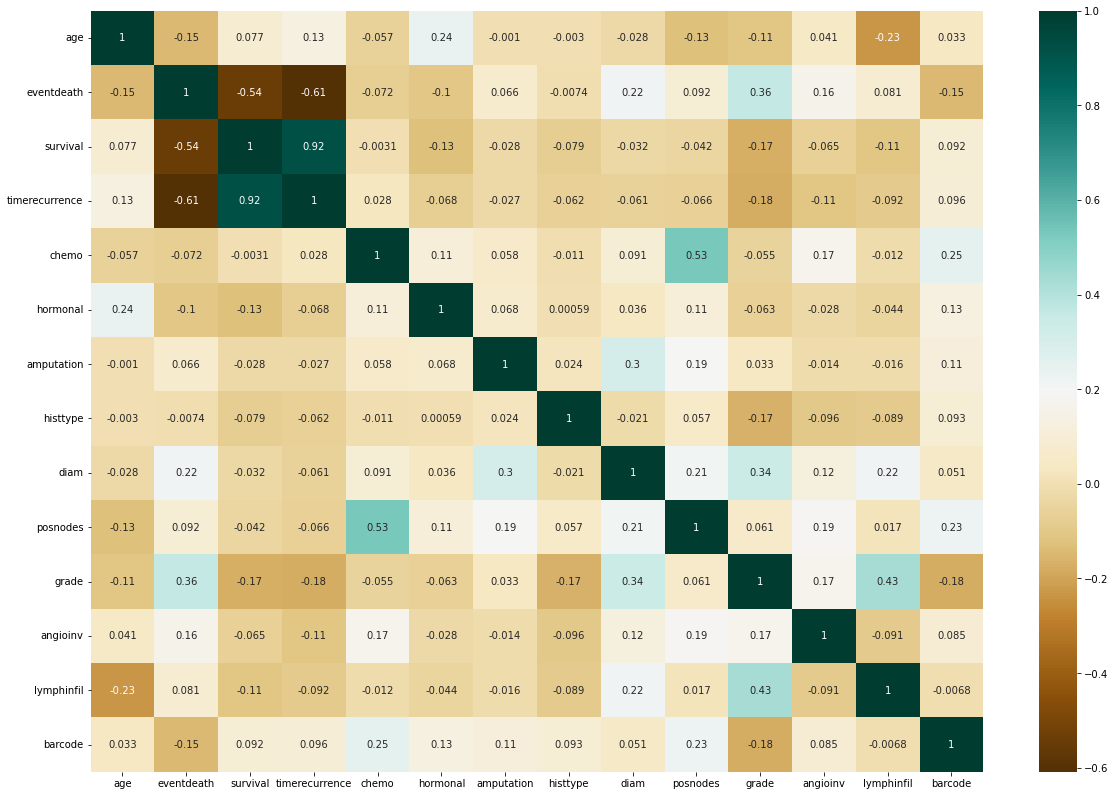

In [10]:
correlation = data.corr()
plt.figure(figsize = (20,14))
sns.heatmap(correlation, cmap='BrBG', annot = True)

In [11]:
corr_diag = data.corr()['eventdeath']
print(corr_diag)

age              -0.147643
eventdeath        1.000000
survival         -0.540482
timerecurrence   -0.608654
chemo            -0.071676
hormonal         -0.100933
amputation        0.066227
histtype         -0.007382
diam              0.215344
posnodes          0.091779
grade             0.359616
angioinv          0.160251
lymphinfil        0.080861
barcode          -0.149263
Name: eventdeath, dtype: float64


## Step 6: Dividing into X and Y sets for the model building

In [12]:
X=data.drop('eventdeath',axis=1)
y=data['eventdeath']

## Step 7: Rescaling the Features
Scaling doesn't impact your model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the 
regression model might be very large or very small as compared to the other coefficients. 
So it is advised to use standardization or normalization so that the units of the coefficients 
obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use standardisation scaling.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['age', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation',
       'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil',
       'barcode']]= scaler.fit_transform(X[['age', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation',
       'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil',
       'barcode']])

X.head()

,age,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil,barcode
ID,,,,,,,,,,,,,
18,-0.192098,1.728368,1.814682,-0.805286,-0.390567,1.125463,-0.202499,0.284390,-0.637497,-0.161582,1.546710,-0.438313,0.079506
19,0.724579,1.585775,1.681393,-0.805286,-0.390567,-0.888523,-0.202499,-0.291161,-0.637497,1.094143,1.546710,-0.438313,0.081058
20,-1.108775,-0.368384,-0.145252,-0.805286,-0.390567,-0.888523,-0.202499,-0.866712,-0.637497,-0.161582,-0.739731,-0.438313,0.082610
21,1.091250,-0.085305,0.119355,-0.805286,2.560382,-0.888523,-0.202499,-0.866712,-0.162431,-0.161582,1.546710,-0.438313,0.084163
22,-1.108775,-0.421768,-0.223387,-0.805286,-0.390567,1.125463,-0.202499,-0.866712,-0.637497,-0.161582,0.403490,-0.438313,0.085715


## Step 8: Splitting the dataset into Train and Test

In [14]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                    test_size=0.2, random_state=100)

## Step 9 : Building a logistics regression Model

In [76]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             eventdeath   No. Observations:                  217
Model:                            GLM   Df Residuals:                      203
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64.607
Date:                Wed, 22 Mar 2023   Deviance:                       129.21
Time:                        00:06:49   Pearson chi2:                     367.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4471
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7674      0.285     -6.

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## Step 10: Using Recursive Feature Elimination(RFE) 

We use RFE to eliminate less important features for effective solution. 
In this problem we have around 13 features. We will find out the more important ones.
1. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; 
2. For example the alogorithm we are using here to fit the features is logistics regression. 
3. But we dont have to use it for RFE. We can for example use Decision tree instead of logistics regression


In [17]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 8)             # running RFE with 8 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True, False,  True, False])

In [18]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 2),
 ('survival', True, 1),
 ('timerecurrence', True, 1),
 ('chemo', False, 2),
 ('hormonal', True, 1),
 ('amputation', False, 2),
 ('histtype', False, 2),
 ('diam', True, 1),
 ('posnodes', False, 2),
 ('grade', True, 1),
 ('angioinv', False, 2),
 ('lymphinfil', True, 1),
 ('barcode', False, 2)]

In [19]:
col = X_train.columns[rfe.support_]

In [20]:
# We see below the columns that have been eliminated using RFE
X_train.columns[~rfe.support_]

Index(['age', 'chemo', 'amputation', 'histtype', 'posnodes', 'angioinv',
       'barcode'],
      dtype='object')

## Step 11: Using Logistics regression on the remaining variables after RFE

In [21]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             eventdeath   No. Observations:                  217
Model:                            GLM   Df Residuals:                      210
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.754
Date:                Wed, 22 Mar 2023   Deviance:                       131.51
Time:                        00:06:33   Pearson chi2:                     370.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4412
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7748      0.282     -6.

In [22]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

ID
134    0.661113
220    0.254675
47     0.990075
121    0.963457
239    0.000475
131    0.001400
21     0.031645
227    0.179442
241    0.941208
88     0.003975
dtype: float64

In [23]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.61112954e-01, 2.54674593e-01, 9.90075374e-01, 9.63457286e-01,
       4.75000630e-04, 1.40044412e-03, 3.16454491e-02, 1.79442135e-01,
       9.41207773e-01, 3.97518622e-03])

In [24]:
y_train_pred_final = pd.DataFrame({'Event_Death':y_train.values, 'Event_Death_Prob':y_train_pred})
y_train_pred_final['Patient_ID'] = y_train.index
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID
0,1,0.661113,134
1,0,0.254675,220
2,1,0.990075,47
3,1,0.963457,121
4,0,0.000475,239


In [25]:
y_train_pred_final['Event_Death_Predicted'] = y_train_pred_final.Event_Death_Prob.map(lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID,Event_Death_Predicted
0,1,0.661113,134,1
1,0,0.254675,220,1
2,1,0.990075,47,1
3,1,0.963457,121,1
4,0,0.000475,239,0


#### Sklearn metrics let you assess the quality of your predictions

In [26]:
from sklearn import metrics

### Confusion Matrix 
1. It is a table that is used in classification problems to assess where errors in the model were made. 
2. The rows represent the actual classes the outcomes should have been. 
3. While the columns represent the predictions we have made. 
4. Using this table it is easy to see which predictions are wrong.

In [27]:
confusion = metrics.confusion_matrix(y_train_pred_final.Event_Death	, y_train_pred_final.Event_Death_Predicted )
print(confusion)

[[97 59]
 [ 4 57]]


In [28]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Event_Death	, y_train_pred_final.Event_Death_Predicted))

0.7096774193548387


## Step 12: Checking Variance Inflation factor (VIF) 

VIF measures the strength of correlation between independent variables in regression analysis.

A correlation plot can be used to identify the correlation or bivariate relationship between two 
independent variables whereas VIF is used to identify the correlation of one independent variable 
with a group of other variables. Hence, it is preferred to use VIF for better understanding.

In [29]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,survival,6.98
1,timerecurrence,6.85
4,grade,1.37
5,lymphinfil,1.23
3,diam,1.13
2,hormonal,1.05


#### In general terms,

1. VIF equal to 1 = variables are not correlated
2. VIF between 1 and 5 = variables are moderately correlated 
3. VIF greater than 5 = variables are highly correlated

So we will eliminate the variable with VIF more than 5. Here we have two variables `survival` and `timerecurrence`
We will drop `survival` first and check the VIF to see if we need to remove the second variable `timerecurrence` 
or not

In [31]:
col = col.drop('survival', 1)
col

Index(['timerecurrence', 'hormonal', 'diam', 'grade', 'lymphinfil'], dtype='object')

## Step 13: Re-run the model using the selected variables

In [32]:

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             eventdeath   No. Observations:                  217
Model:                            GLM   Df Residuals:                      211
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.061
Date:                Wed, 22 Mar 2023   Deviance:                       132.12
Time:                        00:06:33   Pearson chi2:                     324.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4396
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7598      0.280     -6.

In [33]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [34]:
y_train_pred_final = pd.DataFrame({'Event_Death':y_train.values, 'Event_Death_Prob':y_train_pred})
y_train_pred_final['Patient_ID'] = y_train.index
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID
0,1,0.634695,134
1,0,0.237069,220
2,1,0.989245,47
3,1,0.958904,121
4,0,0.000588,239


In [35]:
y_train_pred_final['Event_Death_Predicted'] = y_train_pred_final.Event_Death_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID,Event_Death_Predicted
0,1,0.634695,134,1
1,0,0.237069,220,0
2,1,0.989245,47,1
3,1,0.958904,121,1
4,0,0.000588,239,0


In [36]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Event_Death	, y_train_pred_final.Event_Death_Predicted )
print(confusion)

[[147   9]
 [ 16  45]]


In [37]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Event_Death	, y_train_pred_final.Event_Death_Predicted))

0.8847926267281107


In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,grade,1.36
4,lymphinfil,1.23
2,diam,1.12
0,timerecurrence,1.04
1,hormonal,1.02


In [39]:
## We see that VIF is upto the mark we need . So we can proceed further.

Metrics beyond simply accuracy

In [40]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [41]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7377049180327869

In [42]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.057692307692307696


In [43]:
# Let us calculate specificity
TN / float(TN+FP)

0.9423076923076923

In [44]:
# positive predictive value 
print (TP / float(TP+FP))

0.8333333333333334


In [45]:
# Negative predictive value
print (TN / float(TN+ FN))

0.901840490797546


# Step 14: Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [46]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [47]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Event_Death, y_train_pred_final.Event_Death_Prob, drop_intermediate = False )

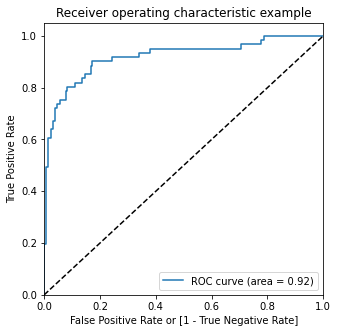

In [48]:
draw_roc(y_train_pred_final.Event_Death, y_train_pred_final.Event_Death_Prob)

In [49]:
# Step 10: Finding Optimal Cutoff Point
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Event_Death_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID,Event_Death_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.634695,134,1,1,1,1,1,1,1,1,0,0,0
1,0,0.237069,220,0,1,1,1,0,0,0,0,0,0,0
2,1,0.989245,47,1,1,1,1,1,1,1,1,1,1,1
3,1,0.958904,121,1,1,1,1,1,1,1,1,1,1,1
4,0,0.000588,239,0,1,0,0,0,0,0,0,0,0,0


## Step 15: Now let's calculate accuracy sensitivity and specificity


In [50]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Event_Death, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.281106  1.000000  0.000000
0.1   0.1  0.714286  0.934426  0.628205
0.2   0.2  0.838710  0.901639  0.814103
0.3   0.3  0.857143  0.819672  0.871795
0.4   0.4  0.875576  0.803279  0.903846
0.5   0.5  0.884793  0.737705  0.942308
0.6   0.6  0.889401  0.704918  0.961538
0.7   0.7  0.870968  0.606557  0.974359
0.8   0.8  0.857143  0.524590  0.987179
0.9   0.9  0.788018  0.262295  0.993590


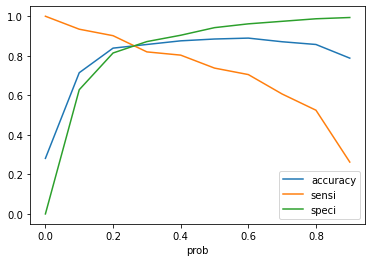

In [51]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [52]:
y_train_pred_final["Final_Predicted"] = y_train_pred_final.Event_Death_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Event_Death,Event_Death_Prob,Patient_ID,Event_Death_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.634695,134,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.237069,220,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.989245,47,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.958904,121,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.000588,239,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Event_Death	, y_train_pred_final.Final_Predicted)
print(confusion)

[[136  20]
 [ 11  50]]


In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Event_Death	, y_train_pred_final.Final_Predicted))

0.8571428571428571


In [55]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Event_Death, y_train_pred_final.Final_Predicted )
confusion2

array([[136,  20],
       [ 11,  50]])

In [56]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [57]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.819672131147541

In [58]:
# Let us calculate specificity
TN / float(TN+FP)

0.8717948717948718

In [59]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1282051282051282


In [60]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7142857142857143


In [61]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9251700680272109


## Step 16: Making predictions on the test set

In [62]:
X_test = X_test[col]
X_test.head()

,timerecurrence,hormonal,diam,grade,lymphinfil
ID,,,,,
78,1.259860,-0.390567,-0.291161,-0.161582,-0.438313
164,-0.283794,-0.390567,2.241262,-0.161582,-0.438313
251,1.586187,-0.390567,0.859941,-1.417307,-0.438313
158,0.021523,2.560382,-0.291161,-0.161582,-0.438313
219,-0.061208,-0.390567,0.284390,-0.161582,-0.438313


In [63]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

ID
78     0.009999
164    0.564829
251    0.002926
158    0.053554
219    0.217022
148    0.762000
147    0.954099
303    0.965483
276    0.950045
94     0.075318
dtype: float64

In [64]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
ID,
78,0.009999
164,0.564829
251,0.002926
158,0.053554
219,0.217022


In [65]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,eventdeath
ID,
78,0
164,0
251,0
158,0
219,0


In [66]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,eventdeath,0
ID,,
78,0,0.009999
164,0,0.564829
251,0,0.002926
158,0,0.053554
219,0,0.217022


In [67]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Event_Death_Prob'})
y_pred_final.head()

,eventdeath,Event_Death_Prob
ID,,
78,0,0.009999
164,0,0.564829
251,0,0.002926
158,0,0.053554
219,0,0.217022


In [68]:
y_pred_final['Patient_ID'] = y_pred_final.index
y_pred_final.reset_index(drop=True, inplace=True)
y_pred_final = y_pred_final[['Patient_ID', 'eventdeath', 'Event_Death_Prob']]
y_pred_final.head()

,Patient_ID,eventdeath,Event_Death_Prob
0,78,0,0.009999
1,164,0,0.564829
2,251,0,0.002926
3,158,0,0.053554
4,219,0,0.217022


In [69]:
y_pred_final['final_predicted'] = y_pred_final.Event_Death_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Patient_ID,eventdeath,Event_Death_Prob,final_predicted
0,78,0,0.009999,0
1,164,0,0.564829,1
2,251,0,0.002926,0
3,158,0,0.053554,0
4,219,0,0.217022,0


In [70]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.eventdeath, y_pred_final.final_predicted)

0.8909090909090909

In [71]:
confusion2 = metrics.confusion_matrix(y_pred_final.eventdeath, y_pred_final.final_predicted )
confusion2

array([[33,  6],
       [ 0, 16]])

In [72]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [74]:
# Let us calculate specificity
TN / float(TN+FP)

0.8461538461538461